# 3.6 주택 가격 예측 : 회귀 문제

- 회귀(regression)문제의 경우 **연속적인 값을 예측**함(앞의 classification처럼 label을 예측하는 것이 아님)
- regression의 적용 예
    - 기상 데이터가 주어졌을 때, 내일 기온 예측
    - 소프트웨어 명세가 주어졌을 때, 프로젝트 완료 시간 예측
    
    
- 회귀(regression)와 로지스틱 회귀(logistic regression)은 다름
- 로지스틱 회귀는 분류(classification) 알고리즘

### 3.6.1 보스턴 주택 가격 데이터셋

- 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율에 따른 주택 가격이 있음
- 총 데이터는 506개(train:404, test:102)로 비교적 개수가 적음
- 각 feature의 scale이 서로 다름

In [1]:
from keras.datasets import boston_housing

(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

print(train_data.shape, train_target.shape)
print(test_data.shape, test_target.shape)

print(train_target)

Using TensorFlow backend.


(404, 13) (404,)
(102, 13) (102,)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 4

### 3.6.2 데이터 준비

- 서로 다른 스케일을 가진 값을 신경망에 주입하면 문제가 있음
- 따라서, 각 특성별로 표준화(z-transformation)를 사용
- **normalization(정규화)**
    - 데이터의 범주를 바꾸는 작업
    - Ex) -100 ~ 100, -10 ~ 10의 데이터가 있을 때, 분석하기 쉽게 하기 위해 0~1의 값으로 범주를 일치시키는 것
    - x = (x-xmin) / (xmax-xmin)
- **standardization(표준화)**
    - 고등학교 때 배운 표준정규분포를 구하는 것, 다른 말로는 z-transformation이라고도 하고, 이렇게 표준화된 값을  z-score라고 함
    - Ex) 표준정규분포를 구하는 것
    - x = (x - mean) / (std)

- 여기서 중요한 것은 ***정규화나 표준화에 사용한 값은 training data***라는 것
- 머신러닝 작업에서 ***절대로 test data에서 계산한 어떤 값도 사용해서는 안됨***

In [2]:
# mean(axis=0), std(axis=0)은 0번째 축 기준(13개의 특성(feature) 각각을 기준)으로 평균, 표준편차를 구한다는 뜻
# 따라서, mean의 결과는 0번째 축 값인 13개의 결과(각 특성에 따른 결과)가 나옴

mean = train_data.mean(axis=0) # 13개의 특성별로 평균을 구함
print(mean.shape)              # 각 특성 별로 13개의 평균이 나옴
train_data -= mean

std = train_data.std(axis=0)   # 13개의 특성 별로 표준편차를 구함
print(std.shape)               # 각 특성 별로 13개의 표준편차가 나옴
train_data /= std


# training data에서 얻은 평균과 표준편차를 사용했음
test_data -= mean
test_data /= std

(13,)
(13,)


### 3.6.3 모델 구성

- 샘플의 수가 적기 때문에 작은 네트워크를 사용(64개의 유닛을 가진 2층의 hidden layer)
- ***일반적으로 training data의 수가 적을수록 overfitting이 더 잘 일어나므로 작은 모델을 사용하는 것이 좋음***


- 마지막 layer는 하나의 유닛을 가지고, 활성화 함수가 없음(선형 층이라고 함)
- loss function : mse(mean squared error), 평균 제곱 오차, 예측과 타깃 사이 거리의 제곱, 회귀 문제에서 널리 사용됨
- 모니터링 지표 : MAE(Mean Absolute Error), 평균 절대 오차, 예측과 타깃 사이 거리의 절대값

In [3]:
from keras import models
from keras import layers

def build_model() :
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    
    return model

### 3.6.4 K-겹 검증을 사용한 훈련 검증 (K-fold cross-validation)

***데이터 수가 적으면*** 검증 세트도 적어짐 
-> 검증 세트와 훈련 세트로 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 크게 달라짐 
-> 검증 세트의 분할에 대한 검증 점수의 분산이 높음
-> ***신뢰있는 모델 평가를 할 수 없음***

이러한 상황에서 가장 좋은 방법은 ***K-겹 교차 검증(K-fold cross-validation)***

**K-겹 교차 검증(K-fold cross-validation)**
- K-겹 교차 검증은 데이터를 K개의 분할(fold)로 나누고(일반적으로 K는 4또는 5), K개의 모델을 만들어 K-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법
- 모델의 검증 점수는 K개의 검증 점수 평균

**Training data, Validation data, Test data**
- Training data
    - 학습 시키는 데이터
    - Validation data를 포함
    - 학습 과정에서 사용됨(model.fit()에 사용됨)
   
- Validation data
    - 검증하는 데이터
    - Training data에서 일부분을 뜯어서 검증 데이터로 사용
    - 학습 과정에서 사용됨(model.fit()에 사용됨)
    
- Test data
    - 학습된 모델을 평가하는 데이터
    - Training data와 구분됨
    - 학습 과정에서 사용 안됨(model.fit()에 사용 X)
    - 가장 마지막 최종 모델 성능 평가에 사용됨

In [4]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("Fold #", (i+1))
    
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_target = train_target[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.append(
        train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:], axis=0
    )
    partial_train_target = np.append(
        train_target[:i*num_val_samples], train_target[(i+1)*num_val_samples:], axis=0
    )
    
    model = build_model()
    model.fit(partial_train_data, partial_train_target,
              epochs=num_epochs, batch_size=1, verbose=0) # verbose=0 : 훈련 과정 출력 X
    
    mse, mae = model.evaluate(val_data, val_target)
    all_scores.append(mae)


print(all_scores)
print(np.mean(all_scores))

Fold # 1
101/101 [==============================] - 0s 156us/step
Fold # 2
101/101 [==============================] - 0s 151us/step
Fold # 3
101/101 [==============================] - 0s 151us/step
Fold # 4
101/101 [==============================] - 0s 153us/step
[2.457306385040283, 2.3487563133239746, 2.5396504402160645, 2.398559808731079]
2.4360682368278503


- ***검증 점수의 변화가 큼***
- 따라서, 이 값들의 ***평균 값을 사용하는 것이 훨씬 신뢰할 수 있는 정보***

이제 K-fold cross validation을 이용해서 아래와 같이 더 자세히 분석

In [5]:
# 각 fold에서의 검증 점수를 로그에 저장하기
# epoch 500으로 늘렸음

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_scores = []

for i in range(k):
    print("Fold #", (i+1))
    
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_target = train_target[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.append(
        train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:], axis=0
    )
    partial_train_target = np.append(
        train_target[:i*num_val_samples], train_target[(i+1)*num_val_samples:], axis=0
    )
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_target,
                     validation_data=(val_data, val_target),
                     epochs=num_epochs, batch_size=1, verbose=0) # verbose=0 : 훈련 과정 출력 X
    
    all_mae_scores.append(hist.history['val_mae'])

Fold # 1
Fold # 2
Fold # 3
Fold # 4


In [6]:
average_mae_history = [np.mean([element[i] for element in all_mae_scores]) for i in range(num_epochs)]

# # 위 한줄 풀어서 쓰면 아래와 같음
# result = []

# for i in range(num_epochs):
#     temp = []
#     for j in range(len(all_mae_scores)):
#         temp.append(all_mae_scores[j][i])
        
#     result.append(np.mean(temp))

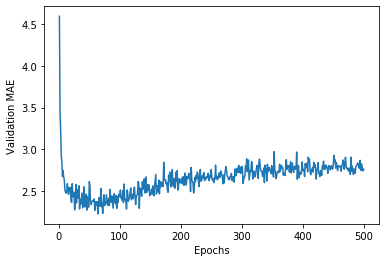

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

그래프의 범위가 크고 변동이 심하므로 아래와 같이 변환
- 곡선의 다른 부분과 스케일이 많이 다른 첫 10개 데이터 포인트 제외
- 지수 이동 평균(exponential moving average) 적용


**지수 이동 평균(exponential moving average)**
- 시계열 데이터를 부드럽게 만드는 기법중 하나
- 이전 값에 가중치(factor)를 곱하고 현재 값에 (1-가중치(factor))를 곱해 합산하는 방식

In [9]:
def smooth_curve(points, factor=0.9):
    smoothed_curve = []
    for point in points:
        if smoothed_curve:
            prev = smoothed_curve[-1]
            smoothed_curve.append(prev*factor + point*(1-factor))
        else:
            smoothed_curve.append(point)
            
    return smoothed_curve

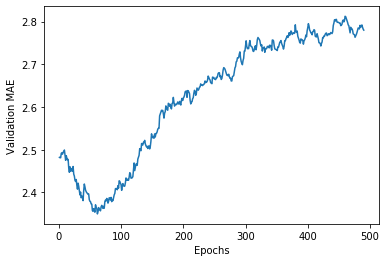

In [10]:
smoothed_curve = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smoothed_curve)+1), smoothed_curve)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- 약 70번째 epoch까지 줄어들다가 그 이후에는 다시 증가함 -> 70번째 이후에 overfitting이 시작
- 70번째까지만 학습시키도록 수정
- ***이처럼 모델의 여러 매개변수에 대한 튜닝이 끝나면(epoch 뿐만 아니라 hidden layer의 크기도 조절 가능) 모든 train data를 사용하고, 최상의 매개변수로 최종 실전에 투입될 모델을 훈련시킴. 그 이후 test data로 성능을 평가***

**Training data, Validation data, Test data**
- Training data
    - 학습 시키는 데이터
    - Validation data를 포함
    - 학습 과정에서 사용됨(model.fit()에 사용됨)
   
- Validation data
    - 검증하는 데이터
    - Training data에서 일부분을 뜯어서 검증 데이터로 사용
    - 학습 과정에서 사용됨(model.fit()에 사용됨)
    
- Test data
    - 학습된 모델을 평가하는 데이터
    - Training data와 구분됨
    - 학습 과정에서 사용 안됨(model.fit()에 사용 X)
    - 가장 마지막 최종 모델 성능 평가에 사용됨

In [11]:
model = build_model()
model.fit(train_data, train_target, epochs=70, batch_size=16, verbose=0)

In [12]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

102/102 [==============================] - 0s 157us/step


In [13]:
print(test_mae_score, "정도의 차이가 나는 것을 확인")

2.6596572399139404 정도의 차이가 나는 것을 확인


### 3.6.5 정리

- 회귀는 분류와 다른 loss function을 사용(일반적으로 Mean Squared Error, MSE를 사용)
- 회귀는 분류와 다른 평가 지표를 사용(일반적으로 Mean Average Error, MAE를 사용)
- 입력 데이터의 feature가 서로 다른 범위를 가지면 전처리 단계에서 각 특성별로 rescale을 해주어야 함
- 데이터의 수가 적으면 K-fold cross validation을 사용
- 데이터의 수가 적다면 overfitting을 막기 위해 hidden layer의 수를 줄인 모델이 좋음(일반적으로 1개 또는 2개)
- ***이 절에서의 과정처럼 최상의 매개변수를 얻어내기 위한 분석을 한 후 모든 train data로 학습시키고, 최종 test dataset으로 모델의 성능 평가***